In [2]:
import flopy
import numpy as np

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
modelname = 'flopy_ex_tao'
mf = flopy.modflow.Modflow(modelname, exe_name='C:/Users/johnny/Downloads/MF2005.1_12/MF2005.1_12/bin/mf2005')


#DIS file
Lx = 10000
Ly = 10000
ztop = 10.0
zbot = -110.0
nlay = 1                                #number of layers
nrow = 100                              #number of rows
ncol = 100                              #number of columns
delr = Lx/ncol                          #cell width along rows
delc = Ly/nrow                          #cell width along columns
delv = (ztop - zbot) / nlay             #cell width along layers
botm = np.linspace(ztop, zbot, nlay+1)  #bottom elevation of a model layer or a Quasi-3d confining bed

x=3
nper = 1+x      # the number of stress periods in the simulation
nstp = [1]+[1]*x      # the number of time steps in a stress period.
perlen = [1]+[240]*x   # the length of a stress period
steady = [True]+[False]*x
itumni = 3       #itumni: indicates the time unit of model data (0:undefined, 1:seconds, 2:minutes, 3:hours, 4:days, 5:years)
lenuni = 2       #lenuni: indicates the length unit of model data (0:undefined, 1:feet, 2:meters, 3:centimeters)

dis = flopy.modflow.ModflowDis(
    mf, nlay, nrow, ncol, delr=delr, delc=delc, top=ztop, botm=botm[1:],
    nper=nper, nstp=nstp, perlen=perlen, itmuni=itumni, steady=steady)


#BAS file
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)   #boundary variable
ibound[:,:,0] = -1
ibound[:,:,-1] = 0
ibound[:,0,:] = 0
ibound[:,-1,:] = 0
strt = np.zeros((nlay, nrow, ncol), dtype=np.float32)   #initial head at the beginning of the simulation
strt[:,:,0] = 0
#strt[:,:,-1] = 0
#strt[:,0,:] = 80
#strt[:,-1,:] = 80
#for i,j in enumerate(np.linspace(100,80,ncol)):
#    strt[:,:,i] = j
    
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)


#Layer Property Flow Package
lpf = flopy.modflow.ModflowLpf(mf, laytyp=0, hk=0.36, vka=0.1 ,sy=0.1, ss=0.001)   
#hk: hydraulic conductivity, vka: vertical hk


#Well
#stress period:[ layer, row, column, Q(m^3/hour)]
Q=-216*10
Q2=0
stress_period_data = {1:[[0,73,73,Q],[0,14,32,Q],[0,18,41,Q],[0,20,66,Q],[0,17,92,Q],
                         [0,37,30,Q],[0,14,47,Q],[0,40,60,Q],[0,38,72,Q],[0,45,90,Q],
                         [0,32,81,Q],[0,50,50,Q],[0,63,35,Q],[0,60,65,Q],[0,58,82,Q],
                         [0,83,95,Q],[0,75,40,Q],[0,77,63,Q],[0,88,80,Q],[0,70,95,Q]],
                      #2:[[0,50,50,-10],[0,30,30,-10],[0,25,90,-10],[0,80,30,-10],[0,80,80,-10],
                      #   [0,54,76,-10],[0,15,45,-10],[0,72,57,-10],[0,64,40,-10],[0,50,8,-30]],
                      8:[[0,73,73,Q2],[0,22,32,Q2],[0,18,41,Q2],[0,20,66,Q2],[0,19,92,Q2],
                         [0,37,30,Q2],[0,14,47,Q2],[0,40,60,Q2],[0,38,72,Q2],[0,45,90,Q2],
                         [0,32,81,Q2],[0,50,50,Q2],[0,63,35,Q2],[0,60,65,Q2],[0,58,82,Q2],
                         [0,83,95,Q2],[0,75,40,Q2],[0,77,63,Q2],[0,88,80,Q2],[0,70,95,Q2]],
                      18:[[0,73,73,Q],[0,14,32,Q],[0,18,41,Q],[0,20,66,Q],[0,17,92,Q],
                         [0,37,30,Q],[0,14,47,Q],[0,40,60,Q],[0,38,72,Q],[0,45,90,Q],
                         [0,32,81,Q],[0,50,50,Q],[0,63,35,Q],[0,60,65,Q],[0,58,82,Q],
                         [0,83,95,Q],[0,75,40,Q],[0,77,63,Q],[0,88,80,Q],[0,70,95,Q]],
                     }
rech={}
rech[0]=0.00005
rech[1]=0.0004
rech[10]=0.0004

print(rech)
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)
rch = flopy.modflow.ModflowRch(mf, rech=rech)


#Output Control
stress_period_data = {}
for kper in range(nper):
    for kstp in range(nstp[kper]):
        stress_period_data[(kper, kstp)] = [
            "save head",
            "save drawdown",
            "save budget",
            "print head",
            "print budget",
        ]
oc = flopy.modflow.ModflowOc(
    mf, stress_period_data=stress_period_data
)


#Preconditioned Conjugate-Gradient Solver
gmg = flopy.modflow.ModflowGmg(mf)


# Write the model input files
mf.write_input()
# Run the model
success, buff = mf.run_model(silent=False)
if not success:
    raise Exception("MODFLOW did not terminate normally.")

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 5e-05, 1: 0.0004, 10: 0.0004}
FloPy is using the following executable to run the model: C:/Users/johnny/Downloads/MF2005.1_12/MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: flopy_ex_tao.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2022/08/20 15:47:27

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2022/08/20 15:47:27
 Elapsed run time:  0.279 Seconds

  Normal termination of simulation


In [4]:
import flopy.utils.binaryfile as bf
hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
for i in times:
    for j in range(1):
        head = hds.get_data(totim=i)
        Z = head[j,:,:]
        Z[0,:]=Z[1,:]
        Z[-1,:]=Z[-2,:]
        Z[:,-1]=Z[:,-2]
        print(i,'   ',Z[50,50],'  ', Z.min(),'  ', Z.max(),'  ', Z.mean(),'  ', Z.std())
        

1.0     46.401512    0.0    61.249996    40.83333    18.468266
241.0     22.991507    0.0    61.970848    40.614185    18.089468
481.0     19.031862    0.0    62.59627    40.379173    17.744831
721.0     17.299967    0.0    63.0984    40.133507    17.411495


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.0, 241.0, 481.0, 721.0]
1.0


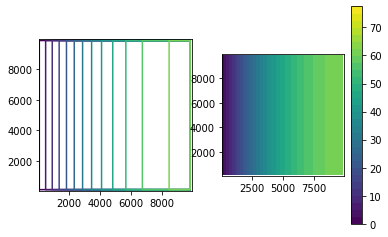

241.0


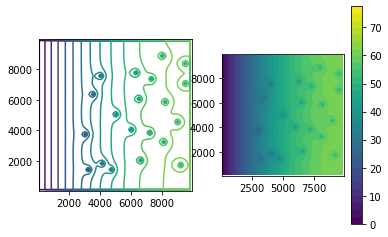

481.0


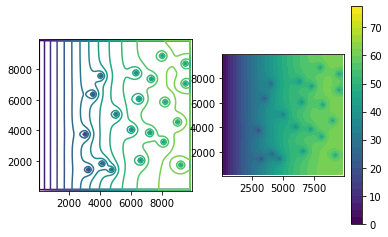

721.0


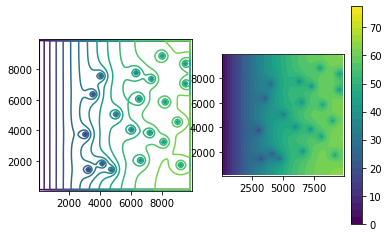

In [8]:
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
print(times)

for i in times:
    for j in range(1):
        print(i)
        plt.subplot(1,2,1,aspect='equal')
        head = hds.get_data(totim=i)
        levels = np.arange(0,80,5)                             #等高線間隔
        extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)   #(x0,x1,y0,y1): (x0, y0),(x1, y1)=position of Z[0,0],Z[-1,-1]
        plt.contour(head[j,:,:],  levels=levels, extent=extent)   #等高線圖

        plt.subplot(1,2,2,aspect='equal')
        head = hds.get_data(totim=i)
        levels = np.arange(0,80,2.5)
        extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)
        plt.contourf(head[j,:,:],  levels=levels, extent=extent)
        plt.colorbar()
        plt.show()
        


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.0, 241.0, 481.0, 721.0]


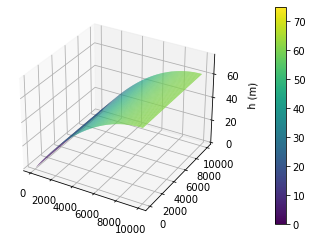

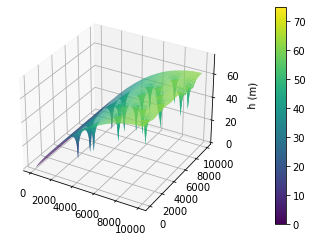

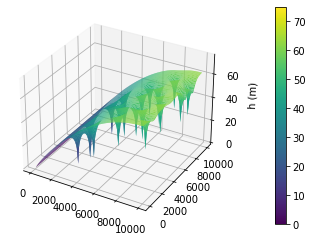

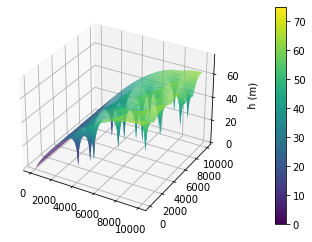

In [6]:
hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
print(times)

for i in times:
    for j in range(1):
        x = np.linspace(delr/2, Lx-delr/2, nrow)
        y = np.linspace(delc/2, Ly-delc/2, ncol)
        X,Y = np.meshgrid(x,y)
        head = hds.get_data(totim=i)
        Z = head[j,:,:]
        Z[0,:]=Z[1,:]
        Z[-1,:]=Z[-2,:]
        Z[:,-1]=Z[:,-2]
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        p = ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none',vmin=0,vmax=75)
        ax.set_zlim(0, 75)
        ax.set_zlabel("h (m)")
        fig.colorbar(p, pad=0.15)

        plt.pause(0.01)
    #break

In [6]:
import pandas as pd
print(np.shape(head))
df = pd.DataFrame(head[0])
df

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1, 100, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,18.945387,36.743877,53.509235,69.351402,84.374809,98.676987,112.347435,125.466843,138.106705,...,641.030518,641.906738,642.682190,643.357544,643.930969,644.398682,644.755859,644.997375,645.119202,645.119202
1,0.0,18.945387,36.743877,53.509235,69.351402,84.374809,98.676987,112.347435,125.466843,138.106705,...,641.030518,641.906738,642.682190,643.357544,643.930969,644.398682,644.755859,644.997375,645.119202,645.119202
2,0.0,18.945358,36.743813,53.509121,69.351219,84.374527,98.676552,112.346764,125.465836,138.105209,...,640.808411,641.670410,642.436035,643.105896,643.677673,644.146484,644.506165,644.750305,644.873779,644.873779
3,0.0,18.945301,36.743683,53.508900,69.350861,84.373962,98.675690,112.345451,125.463867,138.102280,...,640.345337,641.177551,641.922729,642.581787,643.151123,643.623596,643.989868,644.240479,644.367859,644.367859
4,0.0,18.945217,36.743500,53.508579,69.350342,84.373154,98.674438,112.343559,125.461029,138.098068,...,639.602112,640.385315,641.098022,641.741455,642.309937,642.791870,643.172241,643.436096,643.571350,643.571350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,18.946529,36.746357,53.513474,69.358101,84.385040,98.692284,112.369980,125.499687,138.154022,...,633.919128,635.334290,636.410950,637.210144,637.789856,638.199585,638.477783,638.650635,638.733643,638.733643
96,0.0,18.946529,36.746357,53.513477,69.358109,84.385048,98.692299,112.370003,125.499725,138.154068,...,635.194458,636.617126,637.743225,638.615295,639.274902,639.758911,640.097168,640.311401,640.415283,640.415283
97,0.0,18.946529,36.746361,53.513481,69.358109,84.385056,98.692307,112.370018,125.499748,138.154099,...,636.031250,637.448792,638.597351,639.507751,640.211792,640.738525,641.112122,641.351135,641.467712,641.467712
98,0.0,18.946529,36.746361,53.513481,69.358109,84.385056,98.692314,112.370026,125.499756,138.154114,...,636.445374,637.857605,639.014343,639.941162,640.664917,641.210938,641.600830,641.851440,641.973938,641.973938


In [7]:
modelname = 'flopy_ex'
mf = flopy.modflow.Modflow(modelname, exe_name='C:/Users/johnny/Downloads/MF2005.1_12/MF2005.1_12/bin/mf2005')

'''
#DIS file
Lx = 10000
Ly = 10000
ztop = 20.0
zbot = -110.0
nlay = 1                                #number of layers
nrow = 100                              #number of rows
ncol = 100                              #number of columns
delr = Lx/ncol                          #cell width along rows
delc = Ly/nrow                          #cell width along columns
delv = (ztop - zbot) / nlay             #cell width along layers
botm = np.linspace(ztop, zbot, nlay+1)  #bottom elevation of a model layer or a Quasi-3d confining bed
'''
nper = 3        # the number of stress periods in the simulation
nstp = [1]*3      # the number of time steps in a stress period.
perlen = [240]*3   # the length of a stress period
steady = [False]*3
itumni = 3       #itumni: indicates the time unit of model data (0:undefined, 1:seconds, 2:minutes, 3:hours, 4:days, 5:years)
                 #lenuni: indicates the length unit of model data (0:undefined, 1:feet, 2:meters, 3:centimeters)

dis = flopy.modflow.ModflowDis(
    mf, nlay, nrow, ncol, delr=delr, delc=delc, top=ztop, botm=botm[1:],
    nper=nper, nstp=nstp, perlen=perlen, itmuni=itumni, steady=False)


#BAS file
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)   #boundary variable
ibound[:,:,0] = -1
ibound[:,:,-1] = -1
ibound[:,0,:] = 0
ibound[:,-1,:] = 0
strt = hds.get_data(totim=times[-1])   #initial head at the beginning of the simulation
#for i,j in enumerate(np.linspace(100,80,ncol)):
#    strt[:,:,i] = j

Z = head[j,:,:]
Z[0,:]=Z[1,:]
Z[-1,:]=Z[-2,:]
print(i,'   ',Z[50,50],'  ', Z.min())
    
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)


#Layer Property Flow Package
lpf = flopy.modflow.ModflowLpf(mf, laytyp=1, hk=2.16, sy=0.1)   
#hk: hydraulic conductivity, vka: vertical hk


#Well
#stress period:[ layer, row, column, Q(m^3/day)]
Q=-10000
stress_period_data = {0:[[0,50,50,Q],[0,30,30,Q],[0,25,90,Q],[0,75,35,Q],[0,80,80,Q],
                         [0,54,76,Q],[0,15,45,Q],[0,72,57,Q],[0,64,40,Q],[0,50,8,Q]],
                      #2:[[0,50,50,-10],[0,30,30,-10],[0,25,90,-10],[0,80,30,-10],[0,80,80,-10],
                      #   [0,54,76,-10],[0,15,45,-10],[0,72,57,-10],[0,64,40,-10],[0,50,8,-30]],
                      #3:[[0,50,50,0],[0,30,30,0],[0,25,90,0],[0,75,35,0],[0,80,80,0],
                      #   [0,54,76,0],[0,15,45,0],[0,72,57,0],[0,64,40,0],[0,50,8,0]],
                     }
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)


#Output Control
stress_period_data = {}
for kper in range(nper):
    for k in range(10):
        stress_period_data[(kper, k)] = [
            "save head",
            "save drawdown",
            "save budget",
            "print head",
            "print budget",
        ]
oc = flopy.modflow.ModflowOc(
    mf, stress_period_data=stress_period_data
)


#Preconditioned Conjugate-Gradient Solver
pcg = flopy.modflow.ModflowPcg(mf)


# Write the model input files
mf.write_input()
# Run the model
success, buff = mf.run_model()
if not success:
    raise Exception("MODFLOW did not terminate normally.")

8641.0     191.0961    0.0


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FloPy is using the following executable to run the model: C:/Users/johnny/Downloads/MF2005.1_12/MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: flopy_ex.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2022/08/07 22:37:48

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.


Exception: MODFLOW did not terminate normally.

In [ ]:
hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
print(times)

for i in times:
    for j in range(1):
        print(i)
        plt.subplot(1,2,1,aspect='equal')
        head = hds.get_data(totim=i)
        levels = np.arange(0,101,2.5)                             #等高線間隔
        extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)   #(x0,x1,y0,y1): (x0, y0),(x1, y1)=position of Z[0,0],Z[-1,-1]
        plt.contour(head[j,:,:],  levels=levels, extent=extent)   #等高線圖

        plt.subplot(1,2,2,aspect='equal')
        head = hds.get_data(totim=i)
        levels = np.arange(0,101,2.5)
        extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)
        plt.contourf(head[j,:,:],  levels=levels, extent=extent)
        plt.colorbar()
        plt.show()
        


In [ ]:
hds = bf.HeadFile(modelname+'.hds')
times = hds.get_times()
for i in times:
    for j in range(1):
        head = hds.get_data(totim=i)
        Z = head[j,:,:]
        Z[0,:]=Z[1,:]
        Z[-1,:]=Z[-2,:]
        print(i,'   ',Z[50,50],'  ', Z.min())
        

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


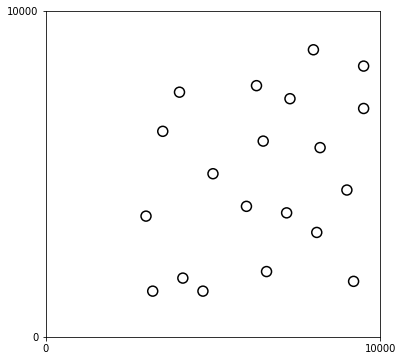

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

vmin = 0
vmax = 10000

y = np.array([23,14,18,20,17,37,44,40,38,45,62,56,63,60,58,83,75,77,88,70])*100
x = np.array([13,32,41,66,92,30,47,60,72,90,21,36,50,65,82,25,50,63,80,95])*100

y2 = np.array([73,14,18,20,17,37,14,40,38,45,32,50,63,60,58,83,75,77,88,70])*100
x2 = np.array([73,32,41,66,92,30,47,60,72,90,81,50,35,65,82,95,40,63,80,95])*100

ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_xticks([vmin,vmax])
ax.set_yticks([vmin,vmax])
ax.scatter(x2, y2, s=100, marker='o',facecolors='none', edgecolors='black', linewidth=1.5)

plt.show()